In [7]:
# cd ..

'/home/wsubuntu/GitHub/keyhandshapediscovery'

In [29]:
import scriptFile as sf
import importlib as impL
import helperFuncs as funcH
import os
import matplotlib.pyplot as plt
os.getcwd()

'/home/wsubuntu/GitHub/keyhandshapediscovery'

/home/wsubuntu/anaconda3/envs/khs_ws5/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


*-*-*
*-*-*


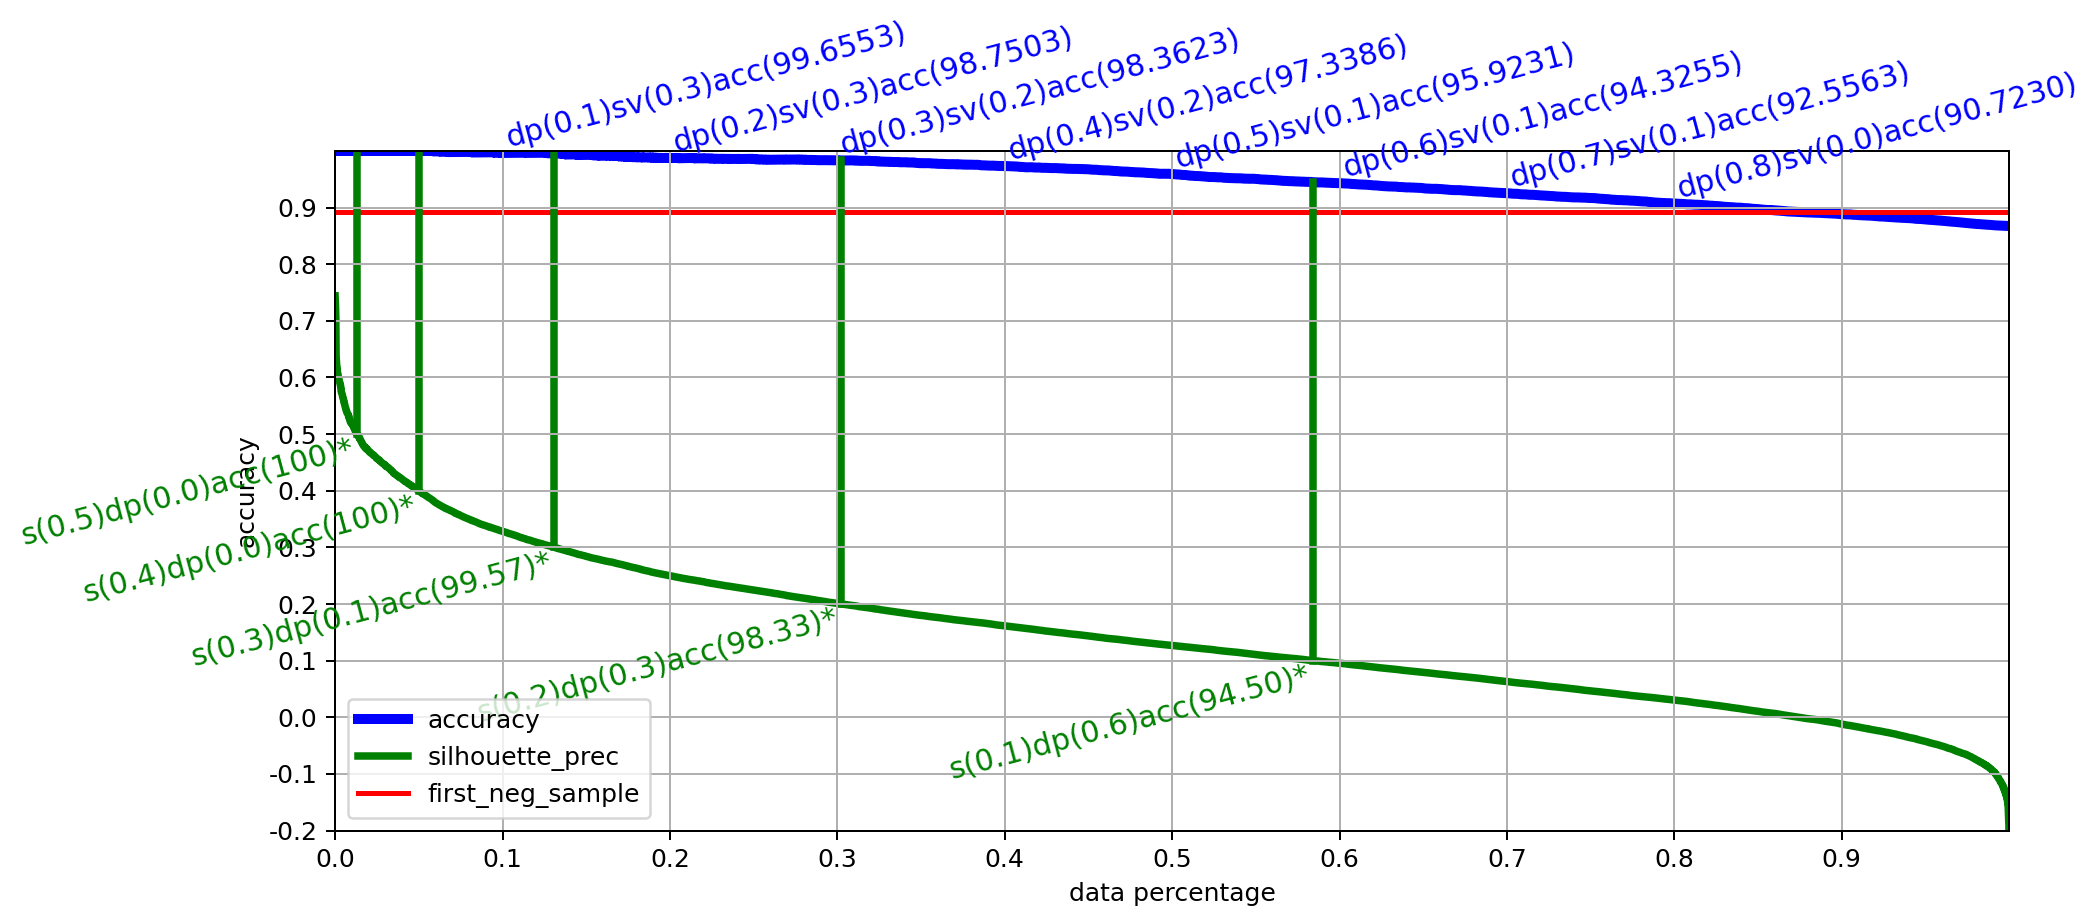

In [92]:
impL.reload(sf)
impL.reload(funcH)
a, result_dict = sf.study_silhouette_analysis(fold_to_run='hgsk_256_11/20210221_hgsk_256_11_cKM256_e10_UMAPud256_un20', bef_aft="before")

In [102]:
fold_1 = funcH.getVariableByComputerName('n2d_experiments') # '/mnt/SSD_Data/DataPath/n2d_experiments'
#fold_2 = '/home/doga/Desktop'
#np.savez(os.path.join(fold_1, 'a.npz'), sample_silhouette_values_sorted=sample_silhouette_values_sorted, labels_sorted=labels_sorted, preds_sorted=preds_sorted, data_perc_vec=data_perc_vec, allow_pickles=True)
#np.savez(os.path.join(fold_1, 'b.npz'), a=a, result_dict=result_dict, allow_pickles=True)
a = np.load(os.path.join(fold_1, 'a.npz'), allow_pickle=True)
b = np.load(os.path.join(fold_1, 'b.npz'), allow_pickle=True)

In [107]:
print(a.files)
print(b.files)
preds_sorted = a['preds_sorted']
labels_sorted = a['labels_sorted']
sample_silhouette_values_sorted = a['sample_silhouette_values_sorted']
print(preds_sorted.shape, type(preds_sorted))
print(labels_sorted.shape, type(labels_sorted))
all_ones = np.ones(preds_sorted.shape, dtype=float)

['sample_silhouette_values_sorted', 'labels_sorted', 'preds_sorted', 'data_perc_vec', 'allow_pickles']
['a', 'result_dict', 'allow_pickles']
(23202,) <class 'numpy.ndarray'>
(23202,) <class 'numpy.ndarray'>


In [108]:
pred_cumsum = np.cumsum(preds_sorted == labels_sorted) / np.cumsum(all_ones)
data_perc_vec = np.arange(0, len(pred_cumsum)) / len(pred_cumsum)

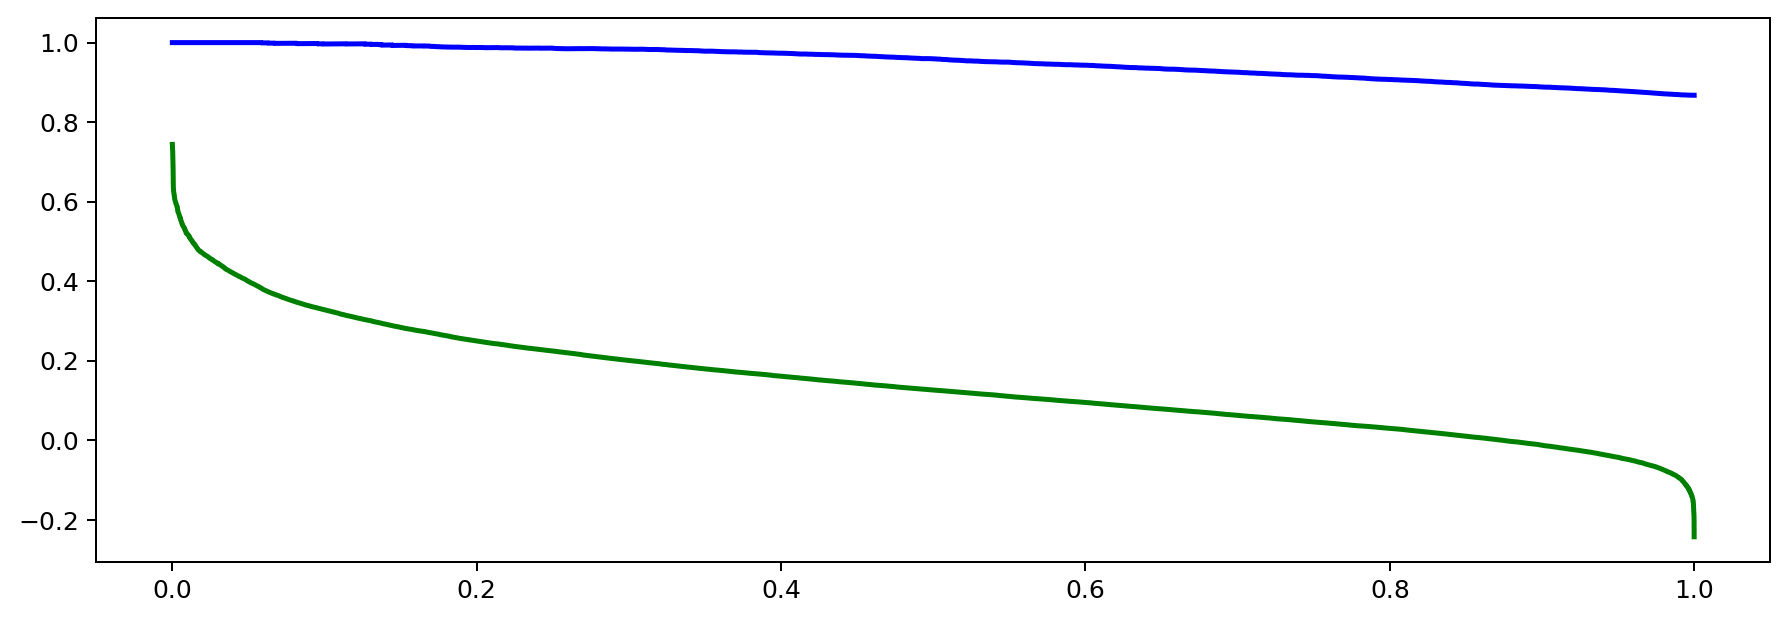

In [109]:
plt.close('all')
fig, ax = plt.subplots(1, figsize=(12,4), dpi=180)
ax.plot(data_perc_vec, pred_cumsum, lw=2, label='accuracy', color='blue', ls='-', zorder=0)
ax.plot(data_perc_vec, sample_silhouette_values_sorted, lw=2, label='accuracy', color='green', ls='-', zorder=0)

In [112]:
print(sample_silhouette_values_sorted)
print(sample_silhouette_values_sorted.shape)
print(type(sample_silhouette_values_sorted))

[ 0.7441337   0.73978984  0.7355816  ... -0.19036202 -0.20128101
 -0.24220473]
(23202,)
<class 'numpy.ndarray'>


In [110]:
for key, value in result_dict.items() :
    print (key)

_confMat
confMat_new
mapped_class_vec
preds_sorted
labels_sorted
data_perc_vec
